In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.listdir()

['.ipynb_checkpoints',
 '1_Patient Expense Prediction Analysis for Doctors - Copy.ipynb',
 'Datasets',
 'Dipin_0102_Simple_Linear_Regression.ipynb',
 'Dipin_Medical Insurance.ipynb',
 'Fuel_Consumption.ipynb',
 'House_Price_Prediction.ipynb',
 'Notes_02_Visuals.ipynb',
 'Operating_Outliers.ipynb',
 'Patient Expense Prediction Analysis for Doctors.ipynb',
 'Patient Expense Prediction Analysis for Doctors_Scaling.ipynb',
 'Patient-Analysis-Expenses.ipynb',
 'Untitled.ipynb',
 'Untitled1.ipynb',
 'Untitled2.ipynb']

In [3]:
os.listdir('Datasets')

['FuelConsumption.csv',
 'House_Price_Prediction.csv',
 'Insurance.csv',
 'Patients_Data.csv']

In [4]:
data=pd.read_csv('Datasets//Patients_Data.csv')

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**We can see the std deviation for all these data columns are not in acceptable range, Other than 'children column', which is somewhat insignificant** 

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 57.6+ KB


Ok, So lets work on feature engineering part, We have 3 Non number columns, Lets make it number using LabelEncoder() 

In [8]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()


In [9]:
data.sex=label.fit_transform(data.sex)
data.smoker=label.fit_transform(data.smoker)
data.region=label.fit_transform(data.region)

In [10]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int32
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null int32
region      1338 non-null int32
charges     1338 non-null float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


So, All values are converted to Numbers, Now we can check for any duplicate values

In [12]:
data.isnull().sum()/len(data)

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Ok. so data is clear !!!

**Now, as we can see the STD value is not acceptable for many cases, Lets work on std deviation part**

In [13]:
data.charges.std()

12110.011236694001

In [14]:
data.charges.mean()

13270.422265141257

Lets plot the dist plot to find out the standard deviation for dataset 

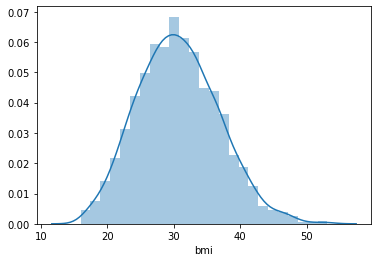

In [15]:
sns.distplot(data.bmi)

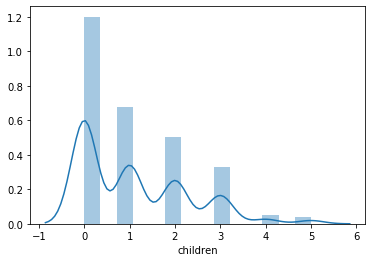

In [16]:
sns.distplot(data.children)

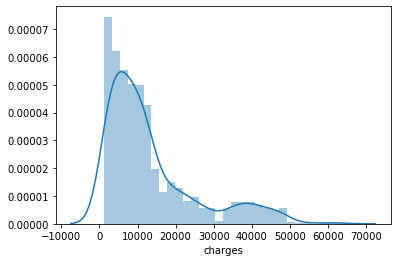

In [17]:
sns.distplot(data.charges)

Lets check the data correlation using heatmap

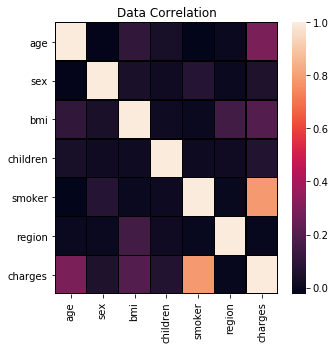

In [18]:
plt.figure(figsize=(5,5))
sns.heatmap(data.corr(),linewidth=0.5, linecolor='Black')
plt.title('Data Correlation')
plt.show()

**Logarithm for normalisation of Output value**
We can take the log of ouput value to reduce the deviation value to work on it, Log is generally making the size of dataset less but keeping the distribution same. At the end, we will be converting log back to exponential. 

In [19]:
y=np.log(data.charges)

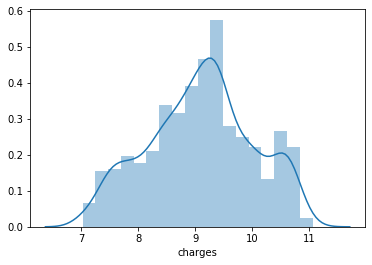

In [20]:
sns.distplot(y)

Output value y seems in bell curve now, Lets work on input values 

In [21]:
x=data.drop('charges', axis=1)

In [22]:
x.describe()

,age,sex,bmi,children,smoker,region
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000


**Now lets describe the relationship between X and Y by Linear regression Model**

In [23]:
from sklearn.linear_model import LinearRegression
regr=LinearRegression()
regr.fit(x,y)
result=regr.predict(x)
score1=regr.score(x,y)

print(score1)

0.7669959067574671


**As per our model, the linear regression score is 0.7669959067574671, which is not in acceptable range, We need to work on feature engineering part to make the score near to 1**  

*lets work on outliers and inliers to reduce the std deviation, to find these points, we will use box plots*

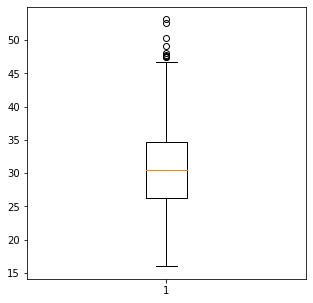

In [24]:
plt.figure(figsize=(5,5))  # bmi Box plot 
plt.boxplot(x.bmi)
plt.show()

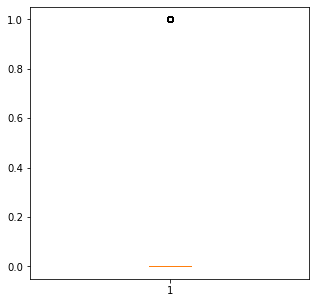

In [25]:
plt.figure(figsize=(5,5))  # Smoker Box plot
plt.boxplot(data.smoker)
plt.show()

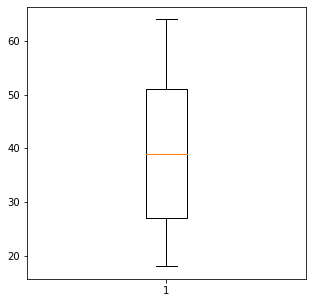

In [26]:
plt.figure(figsize=(5,5)) # Age box plot
plt.boxplot(data.age)
plt.show()

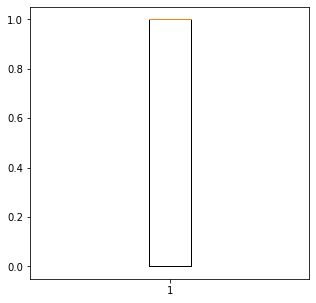

In [27]:
plt.figure(figsize=(5,5)) # Sex box plot
plt.boxplot(data.sex)
plt.show()

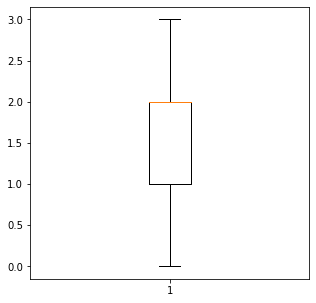

In [28]:
plt.figure(figsize=(5,5)) # region box plot
plt.boxplot(data.region)
plt.show()


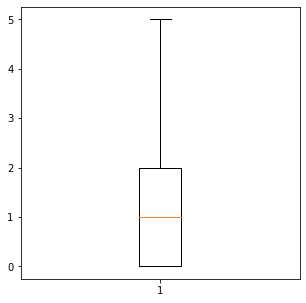

In [29]:
plt.figure(figsize=(5,5)) # children box plot
plt.boxplot(data.children)
plt.show()

**As per the above box plot anaysis, we can see only bmi data is having outliers and we need to rectify that !!**.Lets analysis the Box plot of bmi again

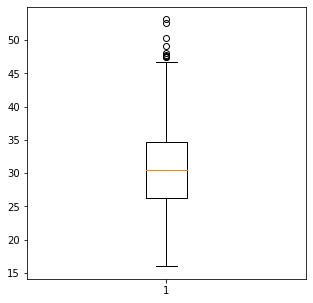

In [30]:
plt.figure(figsize=(5,5))  # bmi Box plot 
plt.boxplot(x.bmi)
plt.show()

We can omit the values above our upper limit as outliners after muitilplying with a factor. 

In [31]:
new_bmi=x.bmi.values

In [32]:
new_bmi

array([27.9 , 33.77, 33.  , ..., 36.85, 25.8 , 29.07])

**Now we are finding the upper value and lower value of box that we can omit the values other than these**

In [33]:
q25,q75=np.percentile(new_bmi,25),np.percentile(new_bmi,75)
print('Qratile 25:', q25, '& Qratile 75:', q75)

Qratile 25: 26.29625 & Qratile 75: 34.69375


In [34]:
new_bmi_iqr=q75-q25
print('iqr=', new_bmi_iqr)

iqr= 8.3975


In [35]:
new_bmi_cutoff=new_bmi_iqr * 1.5
new_bmi_lower,new_bmi_upper=q25-new_bmi_cutoff, q75+new_bmi_cutoff
print('Lower limit is=', new_bmi_lower )
print('Upper limit is=', new_bmi_upper )

Lower limit is= 13.7
Upper limit is= 47.290000000000006


**lets see the outlier values now**

In [36]:
outliers = [x for x in new_bmi if x<new_bmi_lower or x>new_bmi_upper]
print(outliers, len(outliers))

[49.06, 48.07, 47.52, 47.41, 50.38, 47.6, 52.58, 47.74, 53.13] 9


**Here, We have 9 Outlier values, lets drop them from data set**

In [37]:
data_1=data.drop(x[(data.bmi>new_bmi_upper) | (data.bmi<new_bmi_lower)].index)

In [38]:
final_df=data_1.drop('charges', axis=1)

In [39]:
print(final_df)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1329 rows x 6 columns]


**Lets find the values in box plot**

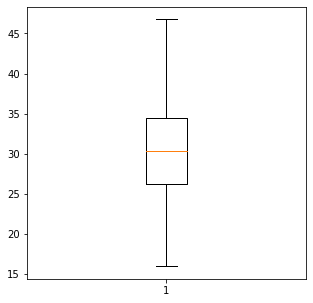

In [40]:
plt.figure(figsize=(5,5))
plt.boxplot(final_df.bmi)
plt.show()

*We can see from the above boxplot that all the outliners have been removed !!, now lets fit this data in linear regression model*

In [41]:
x.shape, final_df.shape, y.shape

((1338, 6), (1329, 6), (1338,))

In [42]:
final_df.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [43]:
y1=np.log(data_1.charges)

In [44]:
regr1=LinearRegression()

In [45]:
regr1.fit(final_df,y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
result=regr1.predict(final_df)

In [47]:
score2=regr1.score(final_df,y1)

In [48]:
score1,score2

(0.7669959067574671, 0.7659960984077349)

**here, the score is improved from 0.7669 to 0.7659 after we removing the outliers**

*now we need to convert the output to exponential back*

In [49]:
np.exp(regr.predict([[53, 1, 39, 2, 1, 2]]))

array([56605.33210857])

In [50]:
np.exp(regr.predict([[19,0,27.9,0,1,3]]))

array([12735.84097628])

*Lets put all these in a model*

In [51]:
l=[]
for i in range (0,6):
    values=int(input('Enter the value'))
    l.append(values)
    i+=1
    
Expense1=np.exp(regr1.predict([l]))
print('Approx. Expenses is =', int(Expense1)) 

Enter the value20
Enter the value1
Enter the value19
Enter the value0
Enter the value1
Enter the value2
Approx. Expenses is = 11399


**Scaling: Minmax & Robust** 
Lets work on scaling methods for improving the score. We need to copy the data and apply these scaling methods to them.

In [52]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
Mscaler = MinMaxScaler()
Rscaler = RobustScaler()

**MinMax Scaling**

In [53]:
Xm=x.copy()
Ym=y.copy()

In [54]:
Xm.shape

(1338, 6)

In [55]:
Ym.shape

(1338,)

In [56]:
Mscaler.fit(Xm)
Xm1=Mscaler.transform(Xm)
Xm1.shape

(1338, 6)

In [57]:
regr=LinearRegression()
regr.fit(Xm1,Ym)
MM_score=regr.score(Xm1,Ym)

In [58]:
MM_score # Score after doing MinMax Scaling

0.7669959067574671

**Robust Scaling**

In [59]:
Xr=x.copy()
Yr=y.copy()

In [60]:
Xr.shape

(1338, 6)

In [61]:
Yr.shape

(1338,)

In [62]:
Rscaler.fit(Xr)
Xr1=Rscaler.transform(Xr)


In [63]:
Xr1.shape

(1338, 6)

In [64]:
regr.fit(Xr1,Yr)
Rb_score=regr.score(Xr1,Yr)

In [65]:
Rb_score

0.7669959067574671

In [66]:
score1,score2,MM_score, Rb_score

(0.7669959067574671,
 0.7659960984077349,
 0.7669959067574671,
 0.7669959067574671)

**We didnt found any improvement in this data set after scaling. Reason is we have only 9 Outliners out of 1338 Datarows**  